### mlb 타자 및 투수 스탯 관련 진행

### 크롤링 진행

In [429]:
# 크롤링 및 시각화를 위한 라이브러리 블러오기
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
import time

In [430]:
#크롬 창 열기
chrome_options = Options()
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')
chrome_options.add_argument('--disable-gpu')  

#url 주소 불러오기
chromeDriver = webdriver.Chrome(options=chrome_options)
chromeDriver.get("https://www.baseball-reference.com/leagues/majors/2023.shtml")

# 페이지 로딩 대기 (IP 밴 방지)
chromeDriver.implicitly_wait(10)

# XPath를 사용하여 원하는 요소 찾기
target_elements = chromeDriver.find_elements(By.XPATH, '//*[@id="div_teams_standard_batting"]')


# 찾은 요소가 있다면 첫 번째 요소의 텍스트 추출
if target_elements:
    print(target_elements)
    print('-'*100)
    target_element = target_elements[0]
    
    # 추출한 텍스트를 줄 단위로 나누어 리스트로 만들기
    lines = target_element.text.split('\n')
    print(lines)
    # 원하는 부분 선택 (48번째부터 53번째까지)
    selected_lines = lines[1:31]
    
# # 브라우저 종료
chromeDriver.quit()

[<selenium.webdriver.remote.webelement.WebElement (session="24a33564e5657fbbd1f660049276192b", element="DFA893CE1A36E1A32EB7B538C74D53CF_element_43")>]
----------------------------------------------------------------------------------------------------
['Tm #Bat BatAge R/G G PA AB R H 2B 3B HR RBI SB CS BB SO BA OBP SLG OPS OPS+ TB GDP HBP SH SF IBB LOB', 'Arizona Diamondbacks 54 27.4 4.60 162 6124 5436 746 1359 274 44 166 706 166 26 540 1247 .250 .322 .408 .730 98 2219 121 58 36 50 11 1091', 'Atlanta Braves 53 27.9 5.85 162 6249 5597 947 1543 293 23 307 916 132 27 538 1289 .276 .344 .501 .845 124 2803 128 67 2 43 20 1062', 'Baltimore Orioles 50 27.3 4.98 162 6123 5495 807 1399 309 28 183 780 114 24 512 1370 .255 .321 .421 .742 107 2313 114 45 21 47 14 1041', 'Boston Red Sox 56 28.6 4.77 162 6174 5562 772 1437 339 19 182 734 112 26 486 1372 .258 .324 .424 .748 100 2360 118 71 11 35 15 1117', 'Chicago Cubs 48 28.4 5.06 162 6220 5504 819 1399 269 30 196 786 140 34 570 1391 .254 .330 .421

In [431]:
processed_data = []  # 처리된 데이터를 저장할 리스트

# 각 행에 대해 반복
for line in selected_lines:
    # 각 행을 공백으로 나누어 리스트로 만들기
    items = line.split()
    
    # 이름은 리스트의 처음부터 마지막에서 28번째 이전까지의 항목
    name = ' '.join(items[:-28])
    
    # 데이터는 마지막에서 28번째부터 끝까지의 항목
    data = items[-28:]
    
    # 이름과 데이터를 리스트에 추가
    processed_data.append([name] + data)

# 처리된 데이터 출력
for item in processed_data:
    print(item)

['Arizona Diamondbacks', '54', '27.4', '4.60', '162', '6124', '5436', '746', '1359', '274', '44', '166', '706', '166', '26', '540', '1247', '.250', '.322', '.408', '.730', '98', '2219', '121', '58', '36', '50', '11', '1091']
['Atlanta Braves', '53', '27.9', '5.85', '162', '6249', '5597', '947', '1543', '293', '23', '307', '916', '132', '27', '538', '1289', '.276', '.344', '.501', '.845', '124', '2803', '128', '67', '2', '43', '20', '1062']
['Baltimore Orioles', '50', '27.3', '4.98', '162', '6123', '5495', '807', '1399', '309', '28', '183', '780', '114', '24', '512', '1370', '.255', '.321', '.421', '.742', '107', '2313', '114', '45', '21', '47', '14', '1041']
['Boston Red Sox', '56', '28.6', '4.77', '162', '6174', '5562', '772', '1437', '339', '19', '182', '734', '112', '26', '486', '1372', '.258', '.324', '.424', '.748', '100', '2360', '118', '71', '11', '35', '15', '1117']
['Chicago Cubs', '48', '28.4', '5.06', '162', '6220', '5504', '819', '1399', '269', '30', '196', '786', '140', '3

In [432]:
#데이터 프레임으로 변경
df = pd.DataFrame(processed_data)

In [433]:
# 컬럼명 이름 설정
columns = ['Team', '#Bat','BatAge','R/G','G', 'PA', 'AB', 'R', 'H', '2B', '3B', 'HR', 'RBI', 'SB', 'CS', 'BB', 'SO', 'BA', 'OBP', 'SLG','OPS','OPS+','TB','GDP','HBP','SH','SF','IBB','LOB']

In [434]:
# 현재의 컬럼 이름 출력
print("현재 컬럼 이름:")
print(df.columns)

# 컬럼 이름 변경
df.columns = columns

# 변경된 컬럼 이름 출력
print("\n변경된 컬럼 이름:")
print(df.columns)

현재 컬럼 이름:
RangeIndex(start=0, stop=29, step=1)

변경된 컬럼 이름:
Index(['Team', '#Bat', 'BatAge', 'R/G', 'G', 'PA', 'AB', 'R', 'H', '2B', '3B',
       'HR', 'RBI', 'SB', 'CS', 'BB', 'SO', 'BA', 'OBP', 'SLG', 'OPS', 'OPS+',
       'TB', 'GDP', 'HBP', 'SH', 'SF', 'IBB', 'LOB'],
      dtype='object')


In [435]:
# 데이터 프레임 항목 변경 확인
df.head()

,Team,#Bat,BatAge,R/G,G,PA,AB,R,H,2B,...,SLG,OPS,OPS+,TB,GDP,HBP,SH,SF,IBB,LOB
0,Arizona Diamondbacks,54,27.4,4.60,162,6124,5436,746,1359,274,...,.408,.730,98,2219,121,58,36,50,11,1091
1,Atlanta Braves,53,27.9,5.85,162,6249,5597,947,1543,293,...,.501,.845,124,2803,128,67,2,43,20,1062
2,Baltimore Orioles,50,27.3,4.98,162,6123,5495,807,1399,309,...,.421,.742,107,2313,114,45,21,47,14,1041
3,Boston Red Sox,56,28.6,4.77,162,6174,5562,772,1437,339,...,.424,.748,100,2360,118,71,11,35,15,1117
4,Chicago Cubs,48,28.4,5.06,162,6220,5504,819,1399,269,...,.421,.751,101,2316,95,77,15,52,11,1127


In [436]:
import pandas as pd

# 'Team' 열을 제외한 모든 열을 선택
columns_to_convert = df.columns.difference(['Team'])

# 선택한 열을 모두 float로 변환
df[columns_to_convert] = df[columns_to_convert].apply(pd.to_numeric, errors='coerce')

In [437]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 29 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Team    30 non-null     object 
 1   #Bat    30 non-null     int64  
 2   BatAge  30 non-null     float64
 3   R/G     30 non-null     float64
 4   G       30 non-null     int64  
 5   PA      30 non-null     int64  
 6   AB      30 non-null     int64  
 7   R       30 non-null     int64  
 8   H       30 non-null     int64  
 9   2B      30 non-null     int64  
 10  3B      30 non-null     int64  
 11  HR      30 non-null     int64  
 12  RBI     30 non-null     int64  
 13  SB      30 non-null     int64  
 14  CS      30 non-null     int64  
 15  BB      30 non-null     int64  
 16  SO      30 non-null     int64  
 17  BA      30 non-null     float64
 18  OBP     30 non-null     float64
 19  SLG     30 non-null     float64
 20  OPS     30 non-null     float64
 21  OPS+    30 non-null     int64  
 22  TB  

In [475]:
df.to_csv('Team Standard Batting.csv')

In [438]:
from scipy.stats import f_oneway

# 30개 구단 선택
teams = df['Team'].unique()[:30]

# 구단별 'OPS+' 값을 저장할 리스트
ops_list = []

# 각 구단의 'OPS+' 값을 구해서 리스트에 추가
for team in teams:
    ops = df[df['Team'] == team]['OPS+']
    ops_list.append(ops)

# ANOVA 수행
f_stat, p_value = f_oneway(*ops_list)

# p-value가 0.05보다 작으면 유의미한 차이가 있다고 판단
if p_value < 0.05:
    print("구단 간에는 통계적으로 유의미한 차이가 있습니다.")
    print(f"F-statistic: {f_stat}")
else:
    print("차이가 없거나 유의미하지 않은 차이가 있습니다.")

차이가 없거나 유의미하지 않은 차이가 있습니다.


c:\Users\USER\miniconda3\envs\OpenAI\Lib\site-packages\scipy\stats\_stats_py.py:4141: DegenerateDataWarning: all input arrays have length 1.  f_oneway requires that at least one input has length greater than 1.
  warnings.warn(stats.DegenerateDataWarning(msg))


c:\Users\USER\miniconda3\envs\OpenAI\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\USER\miniconda3\envs\OpenAI\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


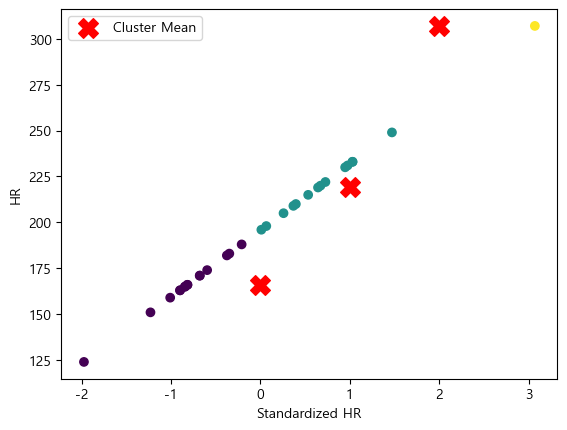

In [461]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False

# 'HR'을 기준으로 클러스터링
X = df[['HR']].values

# 데이터 표준화 (Standardization)
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# K-means 클러스터링 수행 (예: 3개의 클러스터)
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_std)

# 클러스터별 평균 HR 값 계산
cluster_means = df.groupby('Cluster')['HR'].mean()

# 시각화
plt.scatter(X_std[:, 0], df['HR'], c=df['Cluster'], cmap='viridis')
plt.scatter(cluster_means.index, cluster_means.values, c='red', marker='X', s=200, label='Cluster Mean')
plt.xlabel('Standardized HR')
plt.ylabel('HR')
plt.legend()
plt.show()

c:\Users\USER\miniconda3\envs\OpenAI\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


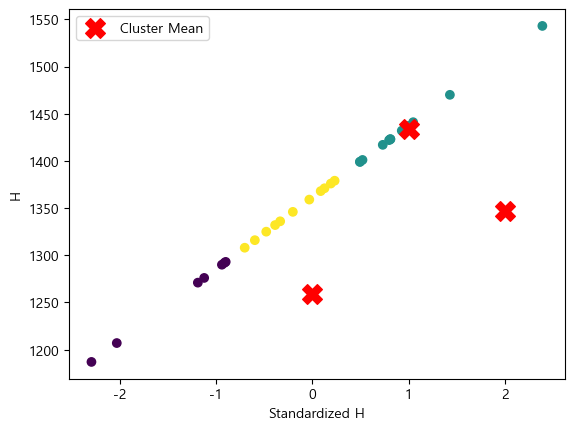

In [460]:
import mkl
mkl.set_num_threads(1)

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import os
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False
os.environ['OMP_NUM_THREADS'] = '1'

# 'H'을 기준으로 클러스터링
X = df[['H']].values

# 데이터 표준화 (Standardization)
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# K-means 클러스터링 수행 (예: 3개의 클러스터)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X_std)


# 클러스터별 평균 HR 값 계산
cluster_means = df.groupby('Cluster')['H'].mean()

# 시각화
plt.scatter(X_std[:, 0], df['H'], c=df['Cluster'], cmap='viridis')
plt.scatter(cluster_means.index, cluster_means.values, c='red', marker='X', s=200, label='Cluster Mean')
plt.xlabel('Standardized H')
plt.ylabel('H')
plt.legend()
plt.show()

c:\Users\USER\miniconda3\envs\OpenAI\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


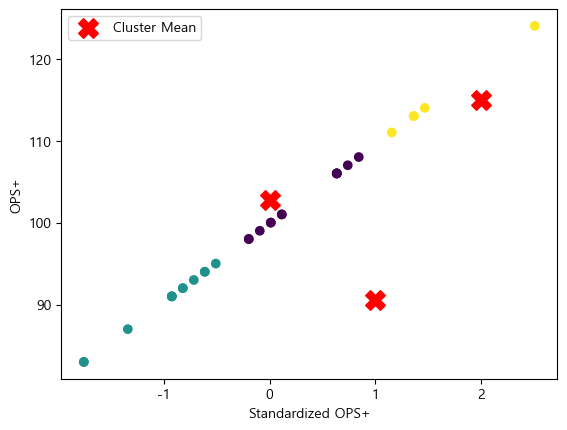

In [459]:
import mkl
mkl.set_num_threads(1)

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import os
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False
os.environ['OMP_NUM_THREADS'] = '1'

# 'H'을 기준으로 클러스터링
X = df[['OPS+']].values

# 데이터 표준화 (Standardization)
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# K-means 클러스터링 수행 (예: 3개의 클러스터)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X_std)

# 클러스터별 평균 HR 값 계산
cluster_means = df.groupby('Cluster')['OPS+'].mean()

# 시각화
plt.scatter(X_std[:, 0], df['OPS+'], c=df['Cluster'], cmap='viridis')
plt.scatter(cluster_means.index, cluster_means.values, c='red', marker='X', s=200, label='Cluster Mean')
plt.xlabel('Standardized OPS+')
plt.ylabel('OPS+')
plt.legend()
plt.show()

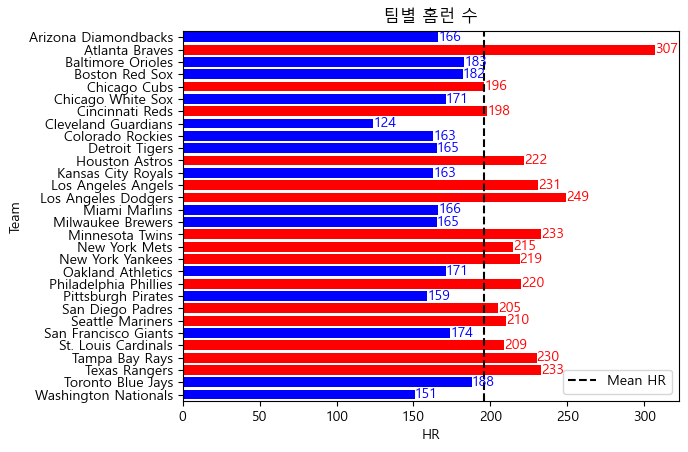

In [490]:
import seaborn as sns
import matplotlib.pyplot as plt

# 판다스 DataFrame에서 '팀'과 '홈런' 열을 사용하여 시각화
ax = sns.barplot(x='HR', y='Team', data=df)

# 평균값 계산
mean_value = df['HR'].mean()

# 평균값을 넘은 데이터를 다르게 색칠하고 표시
for idx, (hr, team) in enumerate(zip(df['HR'], df['Team'])):
    color = 'red' if hr > mean_value else 'blue'
    ax.text(hr, idx, f'{hr}', color=color, ha="left", va="center")

# 평균값 선 추가
ax.axvline(x=mean_value, color='black', linestyle='--', label='Mean HR')

# 막대 색상 설정
colors = ['red' if hr > mean_value else 'blue' for hr in df['HR']]
for bar, color in zip(ax.patches, colors):
    bar.set_facecolor(color)

# 그래프 제목 추가
plt.title('팀별 홈런 수')

# y축 라벨 회전
plt.yticks(rotation=0)

# 범례 추가
plt.legend()

# 그래프 출력
plt.show()

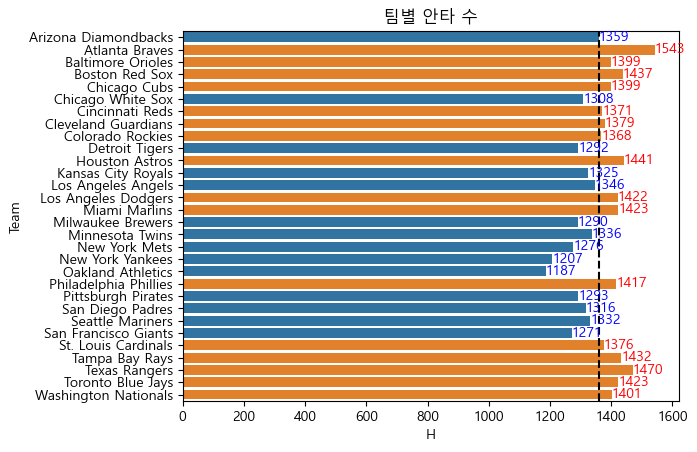

In [492]:
import seaborn as sns
import matplotlib.pyplot as plt

# 평균값 계산
mean_value = df['H'].mean()

# 판다스 DataFrame에서 '팀'과 '홈런' 열을 사용하여 시각화
ax = sns.barplot(x='H', y='Team', data=df, hue=colors, dodge=False)

# 평균값을 넘은 데이터를 다르게 색칠하고 표시
for idx, (h, team) in enumerate(zip(df['H'], df['Team'])):
    color = 'red' if h > mean_value else 'blue'
    ax.text(h, idx, f'{h}', color=color, ha="left", va="center") 

# 평균값 선 추가
ax.axvline(x=mean_value, color='black', linestyle='--', label='Mean H')

# 그래프 제목 추가
plt.title('팀별 안타 수')
# 범례 및 제목 제거
ax.legend().set_visible(False)

# y축 라벨 회전
plt.yticks(rotation=0)

# 그래프 출력
plt.show()

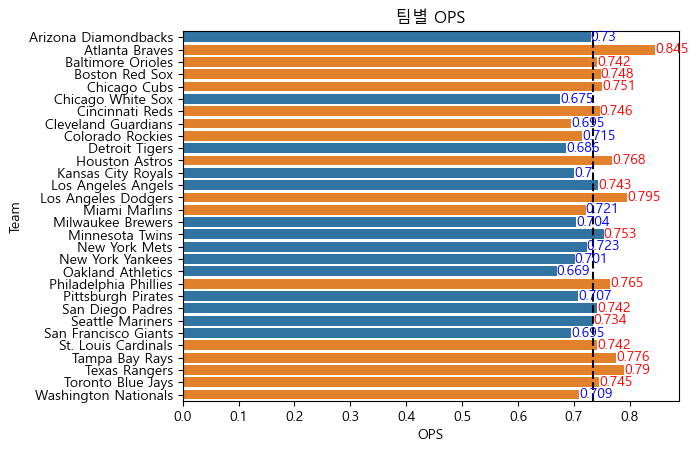

In [494]:
import seaborn as sns
import matplotlib.pyplot as plt

# 평균값 계산
mean_value = df['OPS'].mean()

# 판다스 DataFrame에서 '팀'과 'OPS+' 열을 사용하여 시각화
ax = sns.barplot(x='OPS', y='Team', data=df, hue=colors, dodge=False)

# 평균값을 넘은 데이터를 다르게 색칠하고 표시
for idx, (ops, team) in enumerate(zip(df['OPS'], df['Team'])):
    color = 'red' if ops > mean_value else 'blue'
    ax.text(ops, idx, f'{ops}', color=color, ha="left", va="center") 

# 평균값 선 추가
ax.axvline(x=mean_value, color='black', linestyle='--', label='Mean OPS')

# 그래프 제목 추가
plt.title('팀별 OPS')
# 범례 및 제목 제거
ax.legend().set_visible(False)

# y축 라벨 회전
plt.yticks(rotation=0)

# 그래프 출력
plt.show()

### 투수파트

In [445]:
#크롬 창 열기
chrome_options = Options()
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')
chrome_options.add_argument('--disable-gpu')  

#url 주소 불러오기
chromeDriver = webdriver.Chrome(options=chrome_options)
chromeDriver.get("https://www.baseball-reference.com/leagues/majors/2023.shtml")

# 페이지 로딩 대기 (IP 밴 방지)
chromeDriver.implicitly_wait(10)

# XPath를 사용하여 원하는 요소 찾기
target_elements = chromeDriver.find_elements(By.XPATH, '//*[@id="teams_standard_pitching"]')


# 찾은 요소가 있다면 첫 번째 요소의 텍스트 추출
if target_elements:
    print(target_elements)
    print('-'*100)
    target_element = target_elements[0]
    
    # 추출한 텍스트를 줄 단위로 나누어 리스트로 만들기
    lines = target_element.text.split('\n')
    print(lines)
    # 원하는 부분 선택 (48번째부터 53번째까지)
    selected_lines2 = lines[1:31]
    
# # 브라우저 종료
chromeDriver.quit()

[<selenium.webdriver.remote.webelement.WebElement (session="5bd8233f4d49c4c48b15bc739d10e9e6", element="53879A0AB1CE6631FD470DB4CCB1E9AF_element_43")>]
----------------------------------------------------------------------------------------------------
['Tm #P PAge RA/G W L W-L% ERA G GS GF CG tSho cSho SV IP H R ER HR BB IBB SO HBP BK WP BF ERA+ FIP WHIP H9 HR9 BB9 SO9 SO/W LOB', 'Arizona Diamondbacks 34 28.5 4.70 84 78 .519 4.47 162 162 161 1 9 1 44 1435.1 1375 761 713 197 525 13 1351 48 8 40 6100 98 4.35 1.324 8.6 1.2 3.3 8.5 2.57 1050', 'Atlanta Braves 32 29.9 4.42 104 58 .642 4.14 162 162 161 1 15 1 52 1440.0 1341 716 662 187 534 14 1516 70 8 56 6135 108 4.10 1.302 8.4 1.2 3.3 9.5 2.84 1112', 'Baltimore Orioles 31 28.4 4.19 101 61 .623 3.89 162 162 162 0 12 0 49 1453.2 1334 678 629 177 473 16 1431 63 7 64 6098 106 3.98 1.243 8.3 1.1 2.9 8.9 3.03 1080', 'Boston Red Sox 33 30.0 4.79 78 84 .481 4.52 162 162 162 0 5 0 43 1430.0 1416 776 718 208 497 21 1423 83 4 49 6168 101 4.37 1.338 

In [446]:
processed_data2 = []  # 처리된 데이터를 저장할 리스트

# 각 행에 대해 반복
for line in selected_lines2:
    # 각 행을 공백으로 나누어 리스트로 만들기
    items = line.split()
    
    # 이름은 리스트의 처음부터 마지막에서 36번째 이전까지의 항목
    name = ' '.join(items[:-35])
    
    # 데이터는 마지막에서 36번째부터 끝까지의 항목
    data = items[-35:]
    
    # 이름과 데이터를 리스트에 추가
    processed_data2.append([name] + data)

# 처리된 데이터 출력
for item in processed_data2:
    print(item)

['Arizona Diamondbacks', '34', '28.5', '4.70', '84', '78', '.519', '4.47', '162', '162', '161', '1', '9', '1', '44', '1435.1', '1375', '761', '713', '197', '525', '13', '1351', '48', '8', '40', '6100', '98', '4.35', '1.324', '8.6', '1.2', '3.3', '8.5', '2.57', '1050']
['Atlanta Braves', '32', '29.9', '4.42', '104', '58', '.642', '4.14', '162', '162', '161', '1', '15', '1', '52', '1440.0', '1341', '716', '662', '187', '534', '14', '1516', '70', '8', '56', '6135', '108', '4.10', '1.302', '8.4', '1.2', '3.3', '9.5', '2.84', '1112']
['Baltimore Orioles', '31', '28.4', '4.19', '101', '61', '.623', '3.89', '162', '162', '162', '0', '12', '0', '49', '1453.2', '1334', '678', '629', '177', '473', '16', '1431', '63', '7', '64', '6098', '106', '3.98', '1.243', '8.3', '1.1', '2.9', '8.9', '3.03', '1080']
['Boston Red Sox', '33', '30.0', '4.79', '78', '84', '.481', '4.52', '162', '162', '162', '0', '5', '0', '43', '1430.0', '1416', '776', '718', '208', '497', '21', '1423', '83', '4', '49', '6168', 

In [447]:
# 컬럼명 이름 설정
columns = ['Team', '#P','PAge','RA/G','W', 'L', 'W-L%', 'ERA', 'G', 'GS', 'GF', 'CG', 'tSho', 'cSho', 'SV', 'IP', 'H', 'R', 'ER', 'HR','BB','IBB','SO','HBP','BK','WP','BF','ERA+','FIP','WHIP','H9','HR9','BB9','SO9','SO/W','LOB']

In [448]:
#데이터 프레임으로 변경
df2 = pd.DataFrame(processed_data2)

In [449]:
# 현재의 컬럼 이름 출력
print("현재 컬럼 이름:")
print(df2.columns)

# 컬럼 이름 변경
df2.columns = columns

# 변경된 컬럼 이름 출력
print("\n변경된 컬럼 이름:")
print(df2.columns)

현재 컬럼 이름:
RangeIndex(start=0, stop=36, step=1)

변경된 컬럼 이름:
Index(['Team', '#P', 'PAge', 'RA/G', 'W', 'L', 'W-L%', 'ERA', 'G', 'GS', 'GF',
       'CG', 'tSho', 'cSho', 'SV', 'IP', 'H', 'R', 'ER', 'HR', 'BB', 'IBB',
       'SO', 'HBP', 'BK', 'WP', 'BF', 'ERA+', 'FIP', 'WHIP', 'H9', 'HR9',
       'BB9', 'SO9', 'SO/W', 'LOB'],
      dtype='object')


In [450]:
import pandas as pd

# 'Team' 열을 제외한 모든 열을 선택
columns_to_convert = df2.columns.difference(['Team'])

# 선택한 열을 모두 float로 변환
df2[columns_to_convert] = df2[columns_to_convert].apply(pd.to_numeric, errors='coerce')

In [451]:
df2.head()

,Team,#P,PAge,RA/G,W,L,W-L%,ERA,G,GS,...,BF,ERA+,FIP,WHIP,H9,HR9,BB9,SO9,SO/W,LOB
0,Arizona Diamondbacks,34,28.5,4.70,84,78,0.519,4.47,162,162,...,6100,98,4.35,1.324,8.6,1.2,3.3,8.5,2.57,1050
1,Atlanta Braves,32,29.9,4.42,104,58,0.642,4.14,162,162,...,6135,108,4.10,1.302,8.4,1.2,3.3,9.5,2.84,1112
2,Baltimore Orioles,31,28.4,4.19,101,61,0.623,3.89,162,162,...,6098,106,3.98,1.243,8.3,1.1,2.9,8.9,3.03,1080
3,Boston Red Sox,33,30.0,4.79,78,84,0.481,4.52,162,162,...,6168,101,4.37,1.338,8.9,1.3,3.1,9.0,2.86,1117
4,Chicago Cubs,27,29.6,4.46,83,79,0.512,4.08,162,162,...,6085,110,4.16,1.283,8.3,1.1,3.2,8.6,2.68,1073


In [476]:
df2.to_csv('Team Standard Pitching.csv')

In [452]:
from scipy.stats import f_oneway

# 30개 구단 선택
teams = df2['Team'].unique()[:30]

# 구단별 'OPS+' 값을 저장할 리스트
ops_list = []

# 각 구단의 'OPS+' 값을 구해서 리스트에 추가
for team in teams:
    ops = df2[df2['Team'] == team]['SO']
    ops_list.append(ops)

# ANOVA 수행
f_stat, p_value = f_oneway(*ops_list)

# p-value가 0.05보다 작으면 유의미한 차이가 있다고 판단
if p_value < 0.05:
    print("구단 간에는 통계적으로 유의미한 차이가 있습니다.")
    print(f"F-statistic: {f_stat}")
else:
    print("차이가 없거나 유의미하지 않은 차이가 있습니다.")

차이가 없거나 유의미하지 않은 차이가 있습니다.


c:\Users\USER\miniconda3\envs\OpenAI\Lib\site-packages\scipy\stats\_stats_py.py:4141: DegenerateDataWarning: all input arrays have length 1.  f_oneway requires that at least one input has length greater than 1.
  warnings.warn(stats.DegenerateDataWarning(msg))


c:\Users\USER\miniconda3\envs\OpenAI\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\USER\miniconda3\envs\OpenAI\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


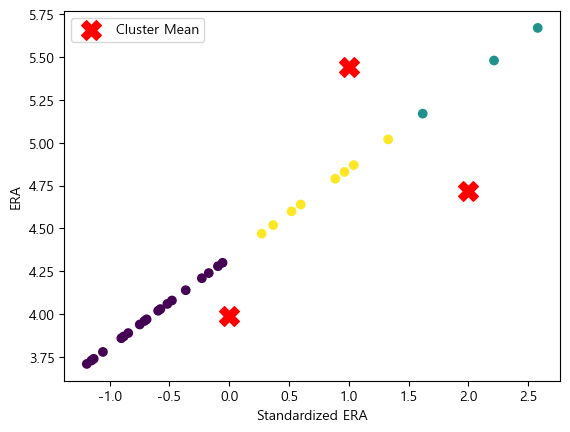

In [458]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False

# 'ERA'를 기준으로 클러스터링
X = df2[['ERA']].values

# 데이터 표준화 (Standardization)
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# K-means 클러스터링 수행 (예: 3개의 클러스터)
kmeans = KMeans(n_clusters=3, random_state=42)
df2['Cluster'] = kmeans.fit_predict(X_std)

# 클러스터별 평균 ERA 값 계산
cluster_means = df2.groupby('Cluster')['ERA'].mean()

# 시각화
plt.scatter(X_std[:, 0], df2['ERA'], c=df2['Cluster'], cmap='viridis')
plt.scatter(cluster_means.index, cluster_means.values, c='red', marker='X', s=200, label='Cluster Mean')
plt.xlabel('Standardized ERA')
plt.ylabel('ERA')
plt.legend()
plt.show()

c:\Users\USER\miniconda3\envs\OpenAI\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\USER\miniconda3\envs\OpenAI\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


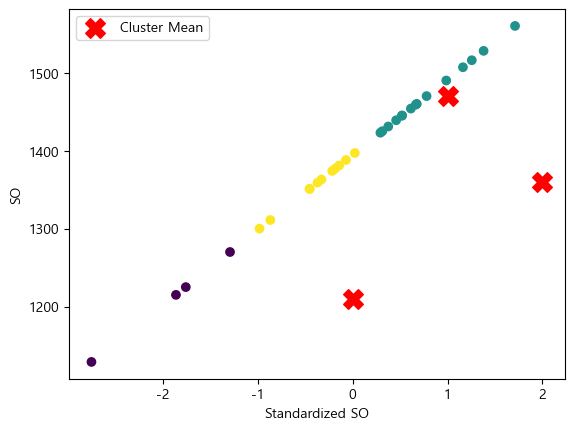

In [457]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False

# 'SO'를 기준으로 클러스터링
X = df2[['SO']].values

# 데이터 표준화 (Standardization)
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# K-means 클러스터링 수행 (예: 3개의 클러스터)
kmeans = KMeans(n_clusters=3, random_state=42)
df2['Cluster'] = kmeans.fit_predict(X_std)

# 클러스터별 평균 ERA 값 계산
cluster_means = df2.groupby('Cluster')['SO'].mean()

# 시각화
plt.scatter(X_std[:, 0], df2['SO'], c=df2['Cluster'], cmap='viridis')
plt.scatter(cluster_means.index, cluster_means.values, c='red', marker='X', s=200, label='Cluster Mean')
plt.xlabel('Standardized SO')
plt.ylabel('SO')
plt.legend()
plt.show()

c:\Users\USER\miniconda3\envs\OpenAI\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\USER\miniconda3\envs\OpenAI\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


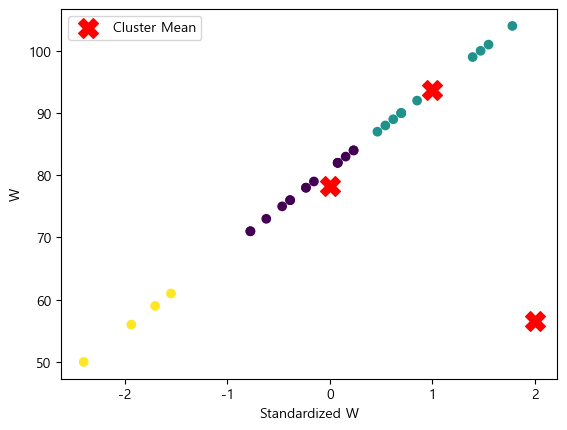

In [456]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False
# 'W'를 기준으로 클러스터링
X = df2[['W']].values

# 데이터 표준화 (Standardization)
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# K-means 클러스터링 수행 (예: 3개의 클러스터)
kmeans = KMeans(n_clusters=3, random_state=42)
df2['Cluster'] = kmeans.fit_predict(X_std)

# 클러스터별 평균 ERA 값 계산
cluster_means = df2.groupby('Cluster')['W'].mean()

# 시각화
plt.scatter(X_std[:, 0], df2['W'], c=df2['Cluster'], cmap='viridis')
plt.scatter(cluster_means.index, cluster_means.values, c='red', marker='X', s=200, label='Cluster Mean')
plt.xlabel('Standardized W')
plt.ylabel('W')
plt.legend()
plt.show()

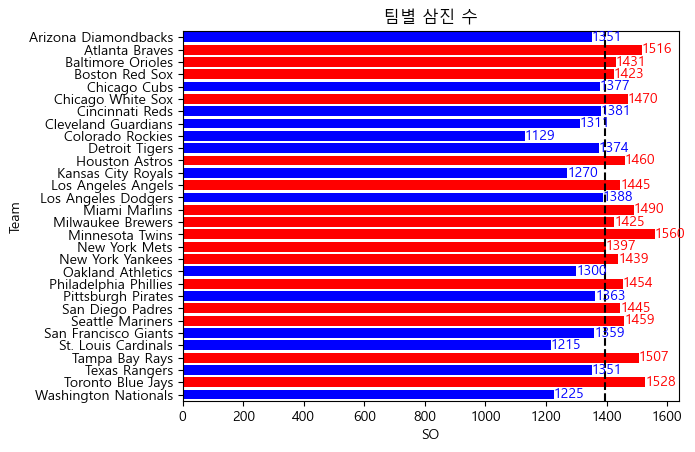

In [489]:
import seaborn as sns
import matplotlib.pyplot as plt

# 판다스 DataFrame에서 '팀'과 '삼진' 열을 사용하여 시각화
ax = sns.barplot(x='SO', y='Team', data=df2)

# 평균값 계산
mean_value = df2['SO'].mean()

# 평균값을 넘은 데이터를 다르게 색칠하고 표시
for idx, (so, team) in enumerate(zip(df2['SO'], df2['Team'])):
    color = 'red' if so > mean_value else 'blue'
    ax.text(so, idx, f'{so}', color=color, ha="left", va="center")

# 평균값 선 추가
ax.axvline(x=mean_value, color='black', linestyle='--', label='Mean SO')

# 막대 색상 설정
colors = ['red' if so > mean_value else 'blue' for so in df2['SO']]
for bar, color in zip(ax.patches, colors):
    bar.set_facecolor(color)

# 그래프 제목 추가
plt.title('팀별 삼진 수')

# y축 라벨 회전
plt.yticks(rotation=0)

# 그래프 출력
plt.show()

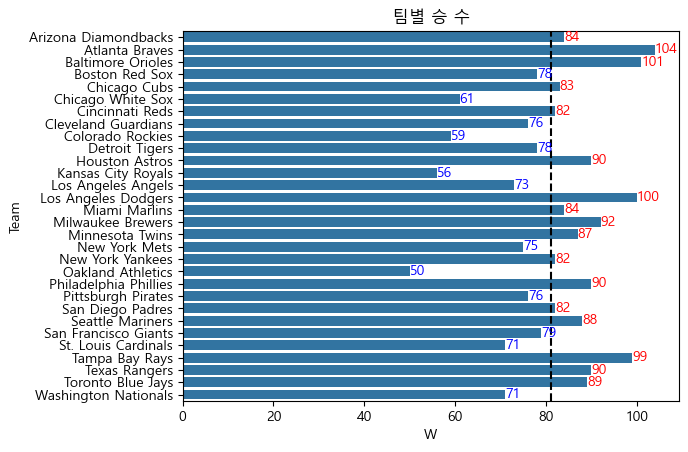

In [485]:
import seaborn as sns
import matplotlib.pyplot as plt

# 판다스 DataFrame에서 '팀'과 '승' 열을 사용하여 시각화
ax = sns.barplot(x='W', y='Team', data=df2)

# 평균값 계산
mean_value = df2['W'].mean()

# 평균값을 넘은 데이터를 다르게 색칠하고 표시
for idx, (w, team) in enumerate(zip(df2['W'], df2['Team'])):
    color = 'red' if w > mean_value else 'blue'
    ax.text(w, idx, f'{w}', color=color, ha="left", va="center")

# 평균값 선 추가
ax.axvline(x=mean_value, color='black', linestyle='--', label='Mean W')

# 그래프 제목 추가
plt.title('팀별 승 수')

# y축 라벨 회전
plt.yticks(rotation=0)


# 그래프 출력
plt.show()

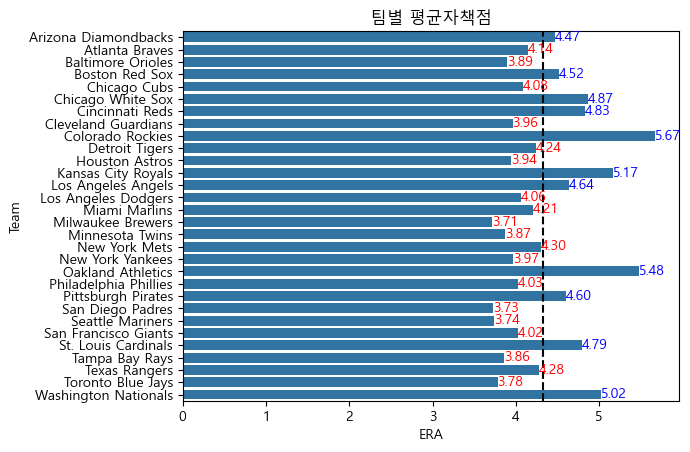

In [480]:
import seaborn as sns
import matplotlib.pyplot as plt

# 판다스 DataFrame에서 '팀'과 'ERA' 열을 사용하여 시각화
ax = sns.barplot(x='ERA', y='Team', data=df2, orient='h')

# 평균값 계산
mean_value = df2['ERA'].mean()

# 평균값을 넘은 데이터를 다르게 색칠하고 표시
for idx, (era, team) in enumerate(zip(df2['ERA'], df2['Team'])):
    color = 'blue' if era > mean_value else 'red'
    ax.text(era, idx, f'{era:.2f}', color=color, ha="left", va="center")

# 평균값 선 추가
ax.axvline(x=mean_value, color='black', linestyle='--', label='Mean ERA')

# 그래프 제목 추가
plt.title('팀별 평균자책점')

# y축 라벨 회전
plt.yticks(rotation=0)

# 그래프 출력
plt.show()
